## LTS Fortunoff Data Analysis

The goal of this notebook is to analyze the data provided by the Fortunoff Archive to the project *Let them Speak* and to offer quantitative insights into the data.

### Import the libraries needed

In [104]:
import sys; sys.path.insert(0, '..')
import pandas as pd
from tqdm.notebook import tqdm

tqdm.pandas()

In [66]:
from Utilities import mongo_helper
from Utilities import blacklab

### Load the necessary data into a panda dataframe

Get the testimonies metadata from the LTS database

In [36]:
collection = "Fortunoff"
db = "LTS"
testimonies = mongo_helper.query("lts","testimonies",{'collection':collection},{'structured_transcript':0,'html_transcript':0,'_id':0})

In [91]:
df_testimonies = pd.DataFrame(testimonies)
df_testimonies =df_testimonies[df_testimonies['status']=="transcript_processed"]

### Print the number of testimonies that are processed and in the dataset

In [92]:
print (len(df_testimonies[df_testimonies['status']=="transcript_processed"]))

176


### Make a historiogram about the distribution of interview years

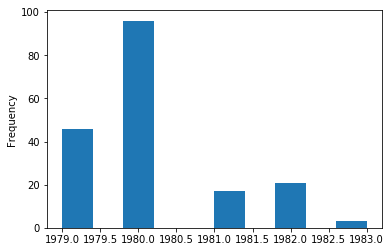

In [53]:
df_testimonies.recording_year.plot.hist()

### Print the earliest and latest interviews

In [57]:
df_testimonies.recording_year.max()

1983

In [58]:
df_testimonies.recording_year.min()

1979

### Print the interview locations

todo

### Print the average token number

In [112]:
def get_token_counts(testimony_id):
    result = blacklab.iterable_results('[]',lemma=False,path_to_phrase_model=None,window=0,document_ids=[testimony_id])
    tokens = [element for element in result]
    return (len(tokens))

In [113]:
df_testimonies['word_count'] = df_testimonies.testimony_id.progress_apply(get_token_counts)

### Print the median token number

In [125]:
df_testimonies['word_count'].median()

12821.0

### Print the shortest interviews

In [118]:
df_testimonies.sort_values('word_count')[0:5][['testimony_title','word_count']]

,testimony_title,word_count
85,Varda H. Holocaust testimony (HVT-90),2475
15,Alexander L. Holocaust testimony (HVT-16),3476
109,Frania R. Holocaust testimony (HVT-115),3850
51,Mendel S. Holocaust testimony (HVT-56),3927
80,Kochevit P. Holocaust testimony (HVT-85),4547


### Print the longest interviews

In [128]:
df_testimonies.sort_values('word_count',ascending=False)[0:5][['testimony_title','word_count']]

,testimony_title,word_count
150,Leo G. Holocaust testimony (HVT-158),38999
63,Hela S. Holocaust testimony (HVT-68),34924
46,Peter G. Holocaust testimony (HVT-51),32556
3,Sylvia B. and Frances G. Holocaust testimony (...,31237
47,Emma S. Holocaust testimony (HVT-52),30085


### Print a histogram

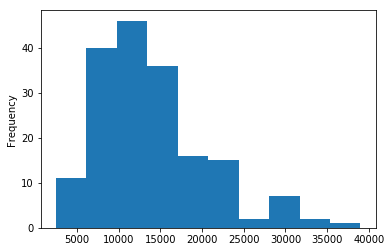

In [130]:
df_testimonies.word_count.plot.hist()

In [131]:
df_testimonies.columns

Index(['recording_year', 'testimony_title', 'ghetto_names', 'gender',
       'provenance', 'camp_names', 'collection', 'interviewee_name',
       'thumbnail_url', 'interview_summary', 'shelfmark', 'testimony_id',
       'media_url', 'status', 'count', 'word_count'],
      dtype='object')

### Print the number of men and women interviewees

First, women:

In [149]:
women = len(df_testimonies[(df_testimonies.gender=="female") & (df_testimonies.testimony_title.str.contains('and')==False)])

In [150]:
print (women)

78


Second, men:

In [148]:
men = len(df_testimonies[(df_testimonies.gender=="male") & (df_testimonies.testimony_title.str.contains('and')==False)])

In [151]:
print (men)

71


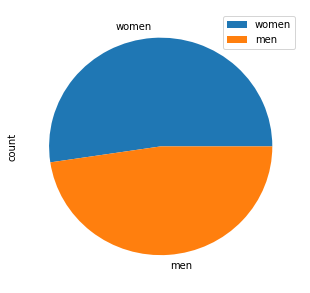

In [155]:
gender_plot = pd.DataFrame({'count':[women,men]},index=['women','men'])
plot = gender_plot.plot.pie(y='count', figsize=(5, 5))

In [162]:
df_testimonies.testimony_id[20]

'HVT-22'